<a href="https://colab.research.google.com/github/rahulpandit123/add_click_prediction/blob/master/Ad_click_pred_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
!ls
from google.colab import drive
drive.mount('/content/drive')



sample_data
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [11]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/hackerearth_data/205e1808-6-dataset.zip', 'r') as zf:
    zf.extractall('/content/drive/My Drive/hackerearth_data/')

FileNotFoundError: ignored

In [0]:
data = pd.read_csv('drive/My Drive/hackerearth_data/train.csv')
test = pd.read_csv('drive/My Drive/hackerearth_data/test.csv')

In [28]:
test.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid
0,IDFDJVI,2017-01-22 09:55:48,755610.0,808980,17714,26391770,b,Mozilla Firefox,Desktop
1,IDNWkTQ,2017-01-22 03:54:39,3714899.0,280355,12052,39507200,b,Edge,Tablet
2,ID9pRmM,2017-01-21 10:25:50,4378333.0,930819,30580,46148550,e,Mozilla Firefox,NaN
3,IDHaQaj,2017-01-22 14:45:53,1754730.0,612234,11837,8837581,b,Edge,Tablet
4,IDT2CrF,2017-01-22 09:34:07,5299909.0,524289,45620,31388981,b,Mozilla,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12137810 entries, 0 to 12137809
Data columns (total 10 columns):
ID             object
datetime       object
siteid         float64
offerid        int64
category       int64
merchant       int64
countrycode    object
browserid      object
devid          object
click          int64
dtypes: float64(1), int64(4), object(5)
memory usage: 926.0+ MB


In [7]:
data.describe()

,siteid,offerid,category,merchant,click
count,1.092530e+07,1.213781e+07,1.213781e+07,1.213781e+07,1.213781e+07
mean,5.023971e+06,4.966571e+05,4.215284e+04,4.901602e+07,3.602083e-02
std,2.904255e+06,2.897379e+05,2.950048e+04,2.916656e+07,1.863420e-01
min,7.100000e+01,0.000000e+00,9.700000e+01,2.604430e+05,0.000000e+00
25%,2.506733e+06,2.475320e+05,1.496000e+04,2.639177e+07,0.000000e+00
50%,4.984805e+06,4.957550e+05,4.033900e+04,4.861553e+07,0.000000e+00
75%,7.582930e+06,7.472350e+05,6.678600e+04,7.436361e+07,0.000000e+00
max,9.999996e+06,9.999980e+05,9.991400e+04,9.977043e+07,1.000000e+00


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


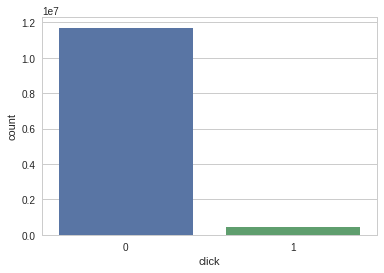

In [8]:
sns.set_style('whitegrid')
sns.countplot(data=data,x='click')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


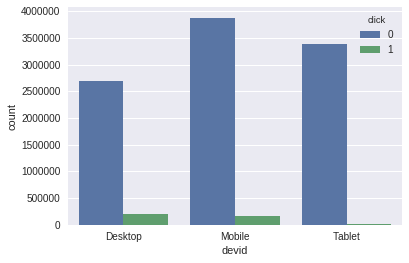

In [9]:
sns.set_style('darkgrid')
sns.countplot(data=data,x='devid',hue='click')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


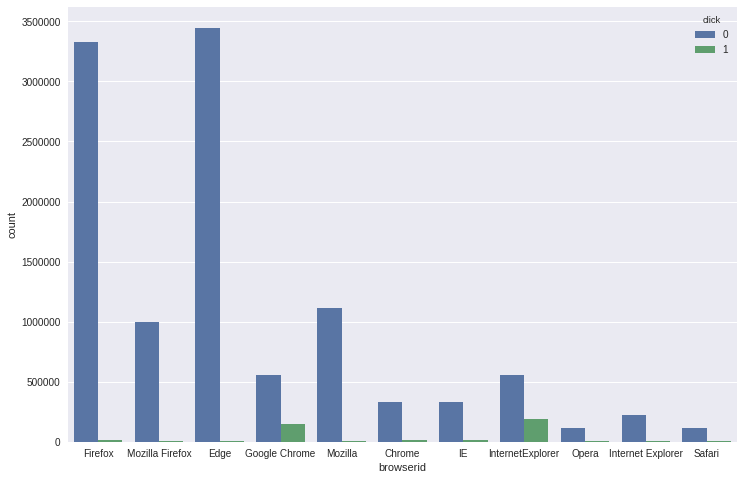

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.countplot(data=data,x='browserid',hue='click')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


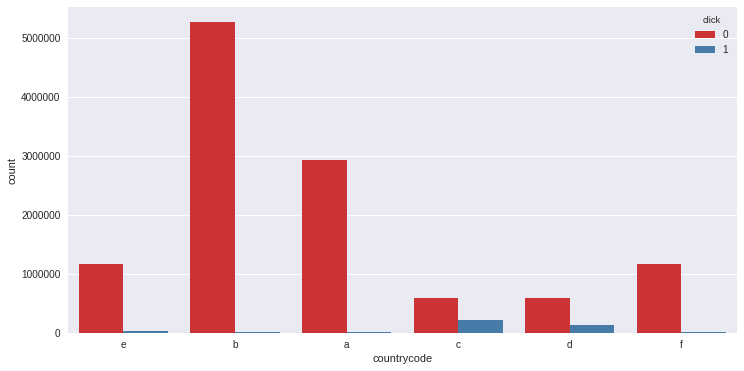

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='countrycode',hue='click',palette='Set1')

In [12]:
data.size

121378100

In [13]:
data.shape

(12137810, 10)

In [14]:
data.columns

Index(['ID', 'datetime', 'siteid', 'offerid', 'category', 'merchant',
       'countrycode', 'browserid', 'devid', 'click'],
      dtype='object')

In [15]:
data.isnull().sum()

ID                   0
datetime             0
siteid         1212515
offerid              0
category             0
merchant             0
countrycode          0
browserid       608327
devid          1820299
click                0
dtype: int64

In [0]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
data['browserid'].fillna('Edge',inplace=True)
test['browserid'].fillna('Edge',inplace=True)

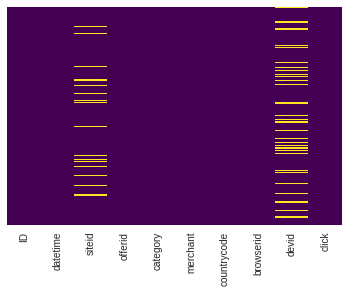

In [121]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [0]:
mean_siteid = data['siteid'].mean()
mean_siteid
mean_test = test['siteid'].mean()

In [0]:
data['siteid'].fillna(5020883.044591596,inplace=True)
test['siteid'].fillna(mean_test,inplace=True)

In [0]:
data['devid'].fillna('Desktop',inplace=True)
test['devid'].fillna('Desktop',inplace=True)


In [0]:
test.columns
test_id = test['ID']

In [50]:
test_id

0          IDFDJVI
1          IDNWkTQ
2          ID9pRmM
3          IDHaQaj
4          IDT2CrF
5          IDFZS6l
6          IDecQv2
7          IDR9hAD
8          IDzZxxC
9          IDqvysv
10         ID0glaO
11         IDtcynu
12         IDFL25i
13         IDOrk16
14         ID9eJOm
15         ID4jcOk
16         IDUymsI
17         ID6pV5P
18         IDIeWTY
19         IDXEp3L
20         IDAARYP
21         IDCCqj3
22         IDMscJr
23         IDu8nxQ
24         IDzYpBs
25         IDh6KmC
26         IDYf7g8
27         IDhj7ih
28         IDB0Gwa
29         IDJ5x0d
            ...   
3706877    IDwFXmy
3706878    IDZlb65
3706879    IDbO1UK
3706880    ID9mn3P
3706881    IDlqTi0
3706882    IDHV5yL
3706883    IDClkHg
3706884    IDUHUbN
3706885    IDMUEyf
3706886    ID6MyBX
3706887    IDIn5b1
3706888    IDRGWT3
3706889    IDJ3KxL
3706890    IDA9x1v
3706891    IDwRynQ
3706892    IDNoFpa
3706893    IDk4Vtd
3706894    ID3oTzG
3706895    IDWCP6x
3706896    IDfBGIy
3706897    IDd2cde
3706898    I

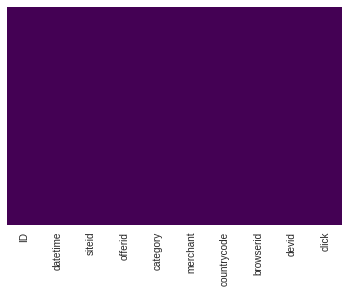

In [127]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: ignored

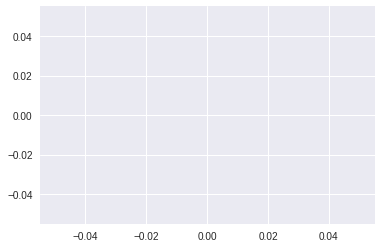

In [128]:
sns.distplot(data['click'],bins=30,kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


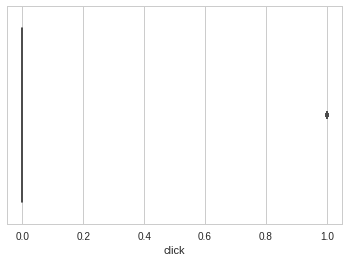

In [99]:
sns.boxplot(data=data,x='click')

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: ignored

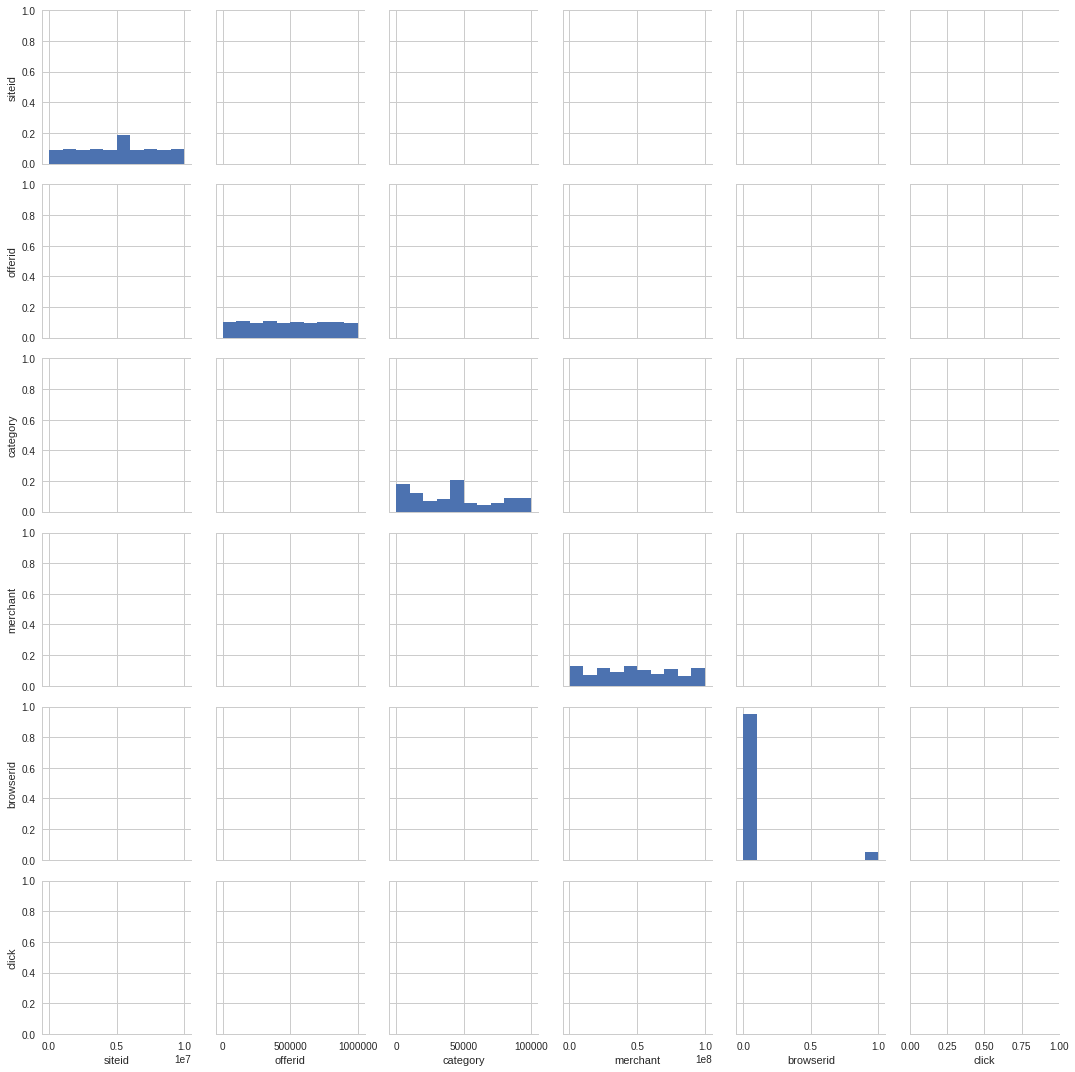

In [100]:
sns.pairplot(data)

In [0]:
#sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

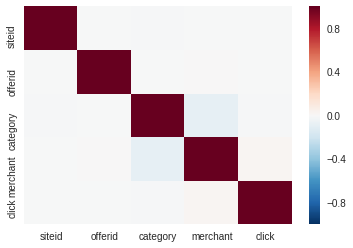

In [146]:
sns.heatmap(data.corr())

CREATING TRAIN TEST SPLIT

**bold text**

In [0]:
X = data[['siteid','offerid','category','merchant']]
y = data[['click']]
test = test[['siteid','offerid','category','merchant']]

In [52]:
X

,siteid,offerid,category,merchant
0,4.709696e+06,887235,17714,20301556
1,5.189467e+06,178235,21407,9434818
2,9.848000e+04,518539,25085,2050923
3,8.896401e+06,390352,40339,72089744
4,5.635120e+06,472937,12052,39507200
5,2.729292e+06,961176,33638,47079934
6,7.007059e+06,664666,68847,58604466
7,7.295565e+06,144797,33638,23981625
8,2.116058e+06,376073,15912,30860214
9,5.329483e+06,952097,89680,74363610


In [53]:
y

,click
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtc = DecisionTreeClassifier()

In [56]:
dtc.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
prediction = dtc.predict(test)

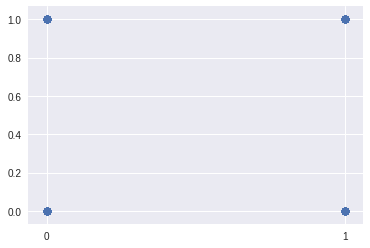

In [18]:
#plt.scatter(test,prediction)

In [0]:
#from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [20]:
#print(confusion_matrix(y_test,prediction))

[[4590167   90023]
 [ 107221   67713]]


In [21]:
#print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98   4680190
          1       0.43      0.39      0.41    174934

avg / total       0.96      0.96      0.96   4855124



In [24]:
#print(accuracy_score(y_test,prediction))

0.9593740551219702


In [58]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
pred_df = pd.DataFrame({'ID' : test_id, 'click' : prediction})
# Create submission file

pred_df.to_csv("drive/My Drive/hackerearth_data/submission.csv", index=False)